In [267]:
import nltk
import pickle
import datetime
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [388]:
df = pd.read_csv("Reviews.csv")

In [118]:
df.head(20)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [5]:
df.columns

Index([u'Id', u'ProductId', u'UserId', u'ProfileName', u'HelpfulnessNumerator',
       u'HelpfulnessDenominator', u'Score', u'Time', u'Summary', u'Text'],
      dtype='object')

In [7]:
print "Number of total unique product:", pd.Series.unique(df["ProductId"]).shape[0]
print "Number of total unique users:", pd.Series.unique(df["UserId"]).shape[0]
# Number of total unique product: 74258
# Number of total unique users: 256059

Number of total unique product: 74258
Number of total unique users: 256059


# Dropped column 'ProfileName'

In [389]:
df = df.drop('ProfileName', axis=1)

In [93]:
df.shape

(568454, 9)

# Dropped duplicated rows

In [390]:
df = df.drop_duplicates(subset=['Text'], keep='first')

In [107]:
df.shape

(393579, 9)

In [112]:
# After removing duplicates
print "Total number of unique products :", pd.Series.unique(df["ProductId"]).shape[0]
print "Total number of unique users:", pd.Series.unique(df["UserId"]).shape[0]
# Total number of unique products: 67554
# Total number of unique users: 256044

Total number of unique products : 67554
Total number of unique users: 256044


# Added two columns: 'WordsInSummary', 'WordsInText'

In [391]:
df["WordsInSummary"] = df["Summary"].apply(lambda k: len(str(k).split()))
df["WordsInText"] = df["Text"].apply(lambda p: len(str(p).split()))

In [109]:
df.shape

(393579, 11)

# Converted timestamp from Unix epoch to readable time
float(64)
readable time formatted with year-value being the integer section of the floating-point number

In [392]:
df['Time'] = [float(datetime.datetime.fromtimestamp(timeStamp).strftime('%Y%m%d.%H%M%S')) / 10000 
              for timeStamp in df['Time']]

In [393]:
df.shape

(393579, 11)

In [394]:
df.head(20)

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,WordsInSummary,WordsInText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011.042620,Good Quality Dog Food,I have bought several of the Vitality canned d...,4,48
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012.090620,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,3,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008.081720,"""Delight"" says it all",This is a confection that has been around a fe...,4,94
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011.061220,Cough Medicine,If you are looking for the secret ingredient i...,2,41
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012.102020,Great taffy,Great taffy at a great price. There was a wid...,2,27
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,0,0,4,2012.071120,Nice Taffy,I got a wild hair for taffy and ordered this f...,2,72
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,0,0,5,2012.061920,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,8,49
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,0,0,5,2012.050220,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,3,24
8,9,B000E7L2R4,A1MZYO9TZK0BBI,1,1,5,2011.112219,Yay Barley,Right now I'm mostly just sprouting this so my...,2,26
9,10,B00171APVA,A21BT40VZCCYT4,0,0,5,2012.102520,Healthy Dog Food,This is a very healthy dog food. Good for thei...,3,25


In [8]:
# HelpfulnessNumerator: number of users who found the review helpful
# HelpfulnessDenominator: number of users who indicated whether they found the review helpful or not helpful
# They don't cancel out

In [217]:
set_productId = set(pd.Series.unique(df["ProductId"]))
set_userId = set(pd.Series.unique(df["UserId"]))
print len(set_productId)
print len(set_userId)

67554
256044


In [ ]:
reviews_groupby_productId = collections.defaultdict(pd.core.frame.DataFrame)

for i, product in enumerate(set_productId):
    reviews_groupby_productId[product] = df.loc[df['ProductId'] == str(product)]
    if i % 100 == 0:
        print i

with open('reviews_dict.pickle', 'wb') as file:
    pickle.dump(reviews_groupby_productId, file)

In [268]:
# Verify
print len(reviews_groupby_productId.keys()), 'products'
print sum(len(i) for i in reviews_groupby_productId.values()), 'reviews'

67554 products
393579 reviews


# Correlation Table

In [103]:
df.columns

Index([u'Id', u'ProductId', u'UserId', u'HelpfulnessNumerator',
       u'HelpfulnessDenominator', u'Score', u'Time', u'Summary', u'Text',
       u'WordsInText', u'WordsInSummary'],
      dtype='object')

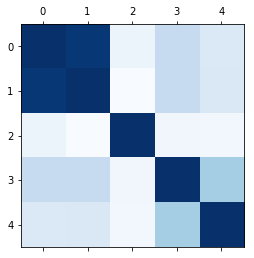

In [116]:
tmp = df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'WordsInSummary', 'WordsInText']]
plt.matshow(tmp.corr(), cmap=plt.cm.Blues)
plt.show()

# Only correlation between 'HelpfulnessNumerator', 'HelpfulnessDenominator' observed

# Loading dicitonary from pickle

In [141]:
with open('reviews_dict.pickle', 'rb') as file:
    reviews_groupby_productId = pickle.load(file)

KeyboardInterrupt: 

# Aggregate Correlation Analysis

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

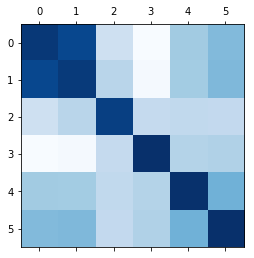

In [217]:
corr_matrix = reviews_groupby_productId[reviews_groupby_productId.keys()[0]][['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'WordsInSummary', 'WordsInText']].corr() * 0.0
#print type(corr_matrix)
#print corr_matrix

i = 0
total_reviews = 0

for product, dataframe in reviews_groupby_productId.iteritems():
    i += 1
    tmp = dataframe[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'WordsInSummary', 'WordsInText']]
    if i % 100 == 0:
        print i
    total_reviews += dataframe.shape[0]
    mat = (tmp.corr() * dataframe.shape[0])
    corr_matrix = corr_matrix.add(tmp.corr() * dataframe.shape[0], fill_value=0)

print total_reviews
corr_matrix = corr_matrix / total_reviews
print corr_matrix
plt.matshow(corr_matrix, cmap=plt.cm.Blues)
plt.show()

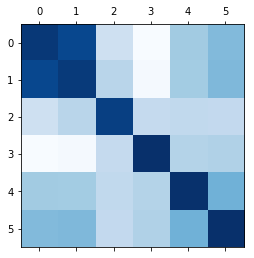

In [224]:
plt.matshow(corr_matrix, cmap=plt.cm.Blues)
plt.show()

# Correlation != Causality

# Distribution of helpful / non-helpful votes over the entire timespan

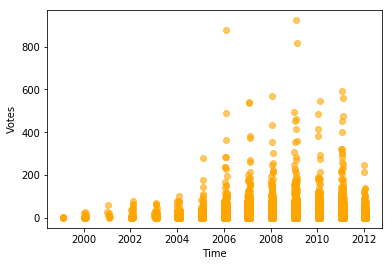

In [396]:
plt.scatter(x=df[['Time']], y=df[['HelpfulnessDenominator']], c='Orange', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Votes')
plt.show()

# if we exclude some outliers in 2006 and 2009, and consider the fact that the reviews are recorded until 10/25/2012, the total number of helpful/non-helpful votes per year, and the distribution of number of votes every year is very similar.

# Distribution of number of helpful / non-helpful votes over reviews

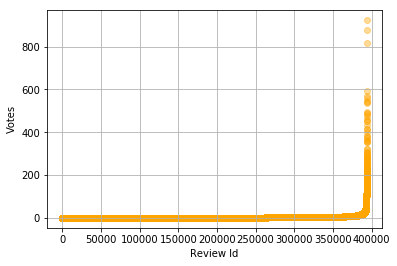

In [445]:
votes_over_reviews = df.sort_values(['HelpfulnessDenominator'], ascending=True)
votes_over_reviews['index'] = [i for i in range(votes_over_reviews.shape[0])]
plt.scatter(x=votes_over_reviews[['index']], y=votes_over_reviews[['HelpfulnessDenominator']], c='Orange', alpha=0.4)

plt.xlabel('Review Id')
plt.ylabel('Votes')
plt.grid(True)
plt.show()

In [ ]:
# Apprearance of helpful votes / most helpful reviews over the recorded time span of each product

In [ ]:
# Correlation between review-order and helpfulness

In [ ]:
# Correlation between helpfulness over total votes, and the sentiment of review title and text

In [114]:
sudo apt-get update
sudo apt-get install python-pip python-dev build-essential
sudo pip install --upgrade pip
sudo pip install pandas
sudo pip install nltk

scp -i ./evilapple.pem ./amazon.py ubuntu@ec2-54-164-51-82.compute-1.amazonaws.com:~
scp -i ./evilapple.pem ../Desktop/cm/Reviews.csv ubuntu@ec2-54-164-51-82.compute-1.amazonaws.com:~
    
export LC_ALL="en_US.UTF-8"
export LC_CTYPE="en_US.UTF-8"

scp -i ./evilapple.pem ubuntu@ec2-54-164-51-82.compute-1.amazonaws.com:~ ../Desktop/cm/

SyntaxError: invalid syntax (<ipython-input-114-5f66b8bacd87>, line 1)

In [395]:
df_sort_time_ascend = df.sort_values(['Time'], ascending=True)
df_sort_time_ascend

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,WordsInSummary,WordsInText
150523,150524,0006641040,ACITT7DI6IDDL,0,0,5,1999.100720,EVERY book is educational,this witty little book makes my son laugh at l...,4,74
150500,150501,0006641040,AJ46FKXOVC7NR,2,2,5,1999.102420,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,12,78
451855,451856,B00004CXX9,AIUWLEQ1ADEG5,0,0,5,1999.120119,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,2,29
230284,230285,B00004RYGX,A344SMIA5JECGM,1,2,5,1999.120519,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",5,36
451854,451855,B00004CXX9,AJH6LUC1UT1ON,0,0,5,2000.010219,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,1,43
230347,230348,B00004RYGX,A1048CYU0OV4O8,2,2,5,2000.010819,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,1,25
230268,230269,B00004RYGX,A1B2IZU1JLZA6,19,23,1,2000.011819,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",7,68
76881,76882,B00002N8SM,A32DW342WBJ6BX,0,0,5,2000.012319,A sure death for flies,I bought a few of these after my apartment was...,5,65
230375,230376,B00004RYGX,ACJR7EQF9S6FP,2,3,4,2000.022519,Bettlejuice...Bettlejuice...BETTLEJUICE!,What happens when you say his name three times...,1,223
230325,230326,B00004RYGX,A2DEE7F9XKP3ZR,0,3,5,2000.060220,Research - Beatlejuice video - French version,I'm getting crazy.I'm looking for Beatlejuice ...,7,33


In [372]:
df_sort_time_ascend.tail(1)

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,WordsInSummary,WordsInText
10403,10404,B005HI55CS,A36ERNIM0TKG3T,0,0,5,2012.10252,Hidden Springs Maple syrup,This is one of the very finest maple syrups I ...,4,33


In [135]:
t = df.loc[0,['UserId', 'Text']]
t.shape


(2,)

In [ ]:
# Create a dictionary to store reviews grouped by product id (key = product id, value = )
# Iterate over the data frame by row
#

dict_of_reviews_groupby_productId = collections.defaultdict(list)

for index, row in df.head(20).iterrows():
    dict_of_reviews_groupby_productId[row['ProductId']].append(\
            [row['UserId'], row['Text'], row['HelpfulnessNumerator'], row['HelpfulnessDenominator'], row['Score'], row['Time'], row['Summary'], row['Text']])

print dict_of_reviews_groupby_productId